### To be done:
1. Architecture of a neural network regression model
2. Input shapes and output shapes of a regression model (features and labels)
3. Creating custom data to view and fit
4. Steps in modeling -

  4.1. Creating a model

  4.2. Compiling a model

  4.3. Fitting a model

  4.4. Evaluating a model

5. Different evaluation methods
6. Saving and loading models


In [ ]:
import tensorflow as tf
import numpy as np
print(tf.__version__ )

2.15.0


### Creating some data to view and fit

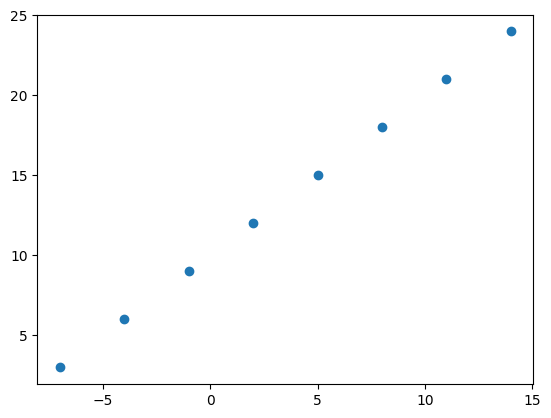

In [ ]:
import matplotlib.pyplot as plt

#Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0]) #independent variable

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]) # dependent variable

# Visualize it
plt.scatter(X,y)

In [ ]:
y == X+10 #the relation we want the network to figure out

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output shapes

In [ ]:
 # Creating a demo tensor for housing price prediction problem
house_info= tf.constant(["bedroom", "bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
# Turning numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape # no dimensions because its a scaler value

(TensorShape([]), TensorShape([]))

### Steps in modeling with TensorFlow

1. **Creating a model** - define the input and output layers as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the functions whicch tells our model how wrong it is) and the optimizer ( tells our model how to imrpove the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model ).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels)

#### Steps :

Get data ready (turn into tensors) -> Build or pick a pretrained model (suiting our problem needs) -> Fit the model to the data and make a prediction -> Evaluate the model -> Improve through experimentation -> Save and reload the trained model

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss= tf.keras.losses.mae,#mae = mean absolute error
              optimizer = tf.keras.optimizers.SGD(), #SGD = stochastic gradient descent
              metrics = ["mae"])

# 3. Fit the model
#model.fit(X,y,epochs = 5)  #this breaks with tensorflow version 2.7.0+
#model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) #change the number of epochs
model.fit(tf.expand_dims(X, axis=-1), y, epochs=50)

Epoch 1/50
1/1 [==============================] - 1s 695ms/step - loss: 20.7091 - mae: 20.7091
Epoch 2/50
1/1 [==============================] - 0s 16ms/step - loss: 20.3637 - mae: 20.3637
Epoch 3/50
1/1 [==============================] - 0s 20ms/step - loss: 20.0825 - mae: 20.0825
Epoch 4/50
1/1 [==============================] - 0s 17ms/step - loss: 19.8012 - mae: 19.8012
Epoch 5/50
1/1 [==============================] - 0s 12ms/step - loss: 19.5200 - mae: 19.5200
Epoch 6/50
1/1 [==============================] - 0s 11ms/step - loss: 19.2387 - mae: 19.2387
Epoch 7/50
1/1 [==============================] - 0s 17ms/step - loss: 18.9575 - mae: 18.9575
Epoch 8/50
1/1 [==============================] - 0s 14ms/step - loss: 18.6762 - mae: 18.6762
Epoch 9/50
1/1 [==============================] - 0s 11ms/step - loss: 18.3950 - mae: 18.3950
Epoch 10/50
1/1 [==============================] - 0s 22ms/step - loss: 18.1137 - mae: 18.1137
Epoch 11/50
1/1 [==============================] - 0s 15ms

In [ ]:
# Checking out X and y to test the model
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Trying to make a prediction
y_pred= model.predict([17.0])
y_pred

1/1 [==============================] - 0s 369ms/step


array([[10.883847]], dtype=float32)

### Improving the neural network model:

Can improve the model,by altering the steps we took to create a model.

1. **Creating a model** - might add more layers, increase the number of hidden units (all called neurons), within each of the hidden layers, change the activation functions of each layer.
2. **Compiling a model** - here we might change the optimization function perhaps the *learning rate* of the optimization function.
3. **Fitting a model** - here we might fit a model for more *epochs* (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
# Rebuilding the model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 7.7445 - mae: 7.7445
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 7.6120 - mae: 7.6120
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 7.4850 - mae: 7.4850
Epoch 4/100
1/1 [==============================] - 0s 24ms/step - loss: 7.4794 - mae: 7.4794
Epoch 5/100
1/1 [==============================] - 0s 60ms/step - loss: 7.4738 - mae: 7.4738
Epoch 6/100
1/1 [==============================] - 0s 39ms/step - loss: 7.4681 - mae: 7.4681
Epoch 7/100
1/1 [==============================] - 0s 25ms/step - loss: 7.4625 - mae: 7.4625
Epoch 8/100
1/1 [==============================] - 0s 24ms/step - loss: 7.4569 - mae: 7.4569
Epoch 9/100
1/1 [==============================] - 0s 25ms/step - loss: 7.4513 - mae: 7.4513
Epoch 10/100
1/1 [==============================] - 0s 51ms/step - loss: 7.4456 - mae: 7.4456
Epoch 11/100
1/1 [==============================] - 0s 28ms/step - loss

In [ ]:
# data looks like :
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Checking the rebuilt model's prediction
y_pred = model.predict([17.0])
y_pred #this time the prediction is closer to actual value [what it should have been]

1/1 [==============================] - 1s 544ms/step


array([[29.900244]], dtype=float32)

In [ ]:
# Again, Rebuilding the model
# extra hidden layer with 100 neurons and changed the optimizer to Adam with a lr of 0.000001

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(lr=0.000001),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.4522 - mae: 13.4522
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 13.3632 - mae: 13.3632
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 13.2741 - mae: 13.2741
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 13.1850 - mae: 13.1850
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 13.0962 - mae: 13.0962
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 13.0077 - mae: 13.0077
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 12.9193 - mae: 12.9193
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 12.8308 - mae: 12.8308
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 12.7425 - mae: 12.7425
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 12.6543 - mae: 12.6543
Epoch 11/100
1/1 [==============================] -

In [ ]:
# And again, Rebuilding the model
# extra hidden layer with 100 neurons and keeping the optimizer same as SGD()

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.4424 - mae: 13.4424
Epoch 2/100
1/1 [==============================] - 0s 50ms/step - loss: 12.9335 - mae: 12.9335
Epoch 3/100
1/1 [==============================] - 0s 62ms/step - loss: 12.4235 - mae: 12.4235
Epoch 4/100
1/1 [==============================] - 0s 33ms/step - loss: 11.9106 - mae: 11.9106
Epoch 5/100
1/1 [==============================] - 0s 56ms/step - loss: 11.3888 - mae: 11.3888
Epoch 6/100
1/1 [==============================] - 0s 39ms/step - loss: 10.8510 - mae: 10.8510
Epoch 7/100
1/1 [==============================] - 0s 48ms/step - loss: 10.2949 - mae: 10.2949
Epoch 8/100
1/1 [==============================] - 0s 53ms/step - loss: 9.7191 - mae: 9.7191
Epoch 9/100
1/1 [==============================] - 0s 42ms/step - loss: 9.1146 - mae: 9.1146
Epoch 10/100
1/1 [==============================] - 0s 24ms/step - loss: 8.4799 - mae: 8.4799
Epoch 11/100
1/1 [==============================] - 0s 38

In [ ]:
# Printing X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Making a prediction with the new model
y_pred = model.predict([17.0])
y_pred #the model is overfitting ie, its learning from training data too well and giving inaccurate predictions on testing data

1/1 [==============================] - 0s 212ms/step


array([[32.501]], dtype=float32)

### Common ways to improve a deep model:
1. Adding layers
2. Increasing the number of hidden units (neurons)
3. Changing the activation functions
4. Change the optimization function
5. Changing the learning rate of the optimization function
6. Fitting on more data (manipulating the training data size)
7. Fitting for longer (increasing the number of epochs)

### Evaluating a model

In practice , a typical workflow we go through when building neural networks:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> .....
```

#### Evaluation of model:

The foundation of this step is based upon **visualization**.

A good idea to visualize:
* The data - what data we are working with? what does it look like?
* The model itself - what does the model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictinos of a model line up against the ground truth? (the original labels)

In [ ]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y= X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

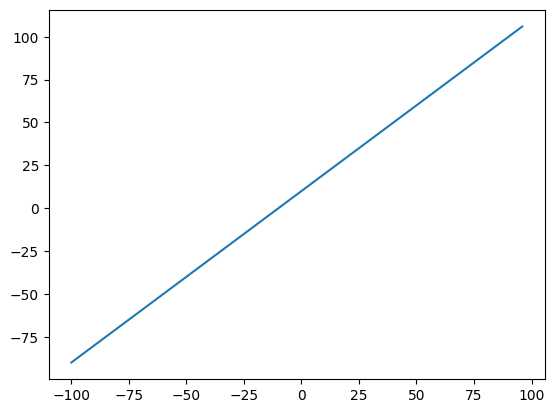

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.plot(X,y)

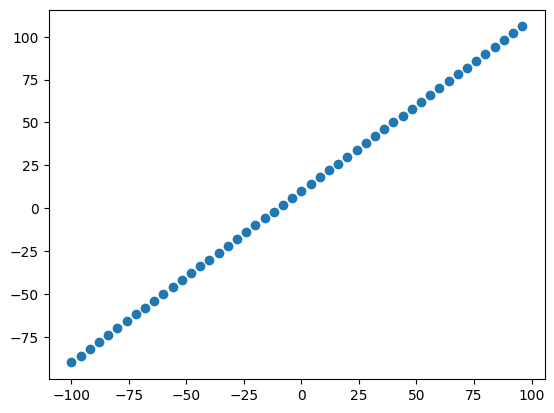

In [ ]:
plt.scatter(X,y)

#### Splitting the data into the 3 sets ⁉

* **Training set** - the model learnsfrom this data, which is typically 70 - 80% of the total data that is available.
* V**alidation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [ ]:
# Checking the length of samples present-
len(X)

50

In [ ]:
# Splitting the data into train and test sets (skipping validation set for now because the sample is too small)-
X_train = X[:40] # first 40 are the training samples (80% of the data)
y_train = y[:40]
X_test = X[40:] # last 10 are the testing samples (20% of the data)
y_test = y[40:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

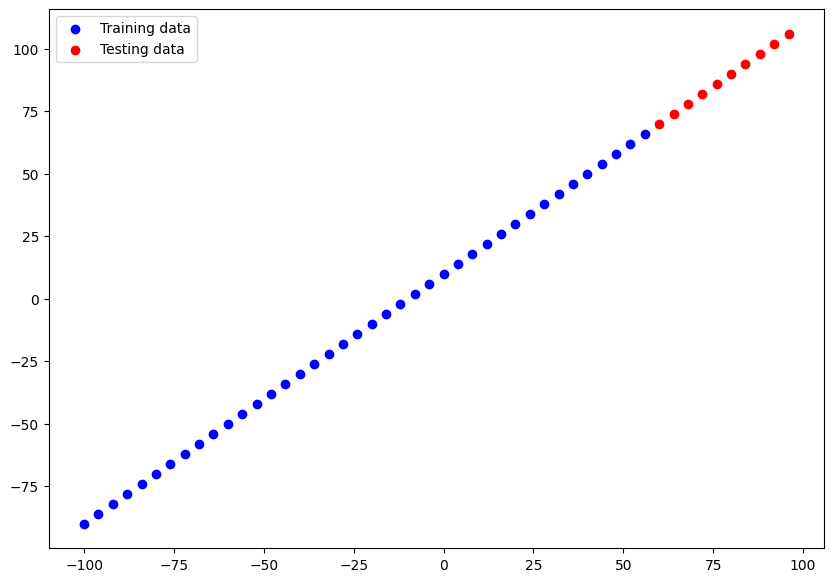

In [ ]:
### Visualizing the data
plt.figure(figsize = (10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b",label="Training data")

# Plot the testing data in red
plt.scatter(X_test, y_test, c="r",label = "Testing data")

# Showing a legend
plt.legend();

In [ ]:
# Creating the model for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
#model.fit(X_train, y_train, epochs=100)

In [ ]:
# Visualizing the model
model.summary() #Pay attention to the error

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
# Creating a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense( 1, input_shape=[1]) #passing 1 number to predict 1 number
])

# 2. Compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable params - these are the parameters (patterns) that the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when we bring in already learned patterns or parameters from other models during **transfer learning** )


In [ ]:
# Fitting the model to training data
model.fit(X_train,y_train, epochs=100, verbose=1) #set verbose=0 for silent fitting of the model

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 72.5626 - mae: 72.5626
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 37.2766 - mae: 37.2766
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 8.4438 - mae: 8.4438
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2708 - mae: 9.2708
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 10.1313 - mae: 10.1313
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4013 - mae: 9.4013
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.5488 - mae: 8.5488
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0611 - mae: 9.0611
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 18.6610 - mae: 18.6610
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.0778 - mae: 10.0778
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - l

In [ ]:
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]) #passing 1 number to predict 1 number
])

# 2. Compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
Total params: 20 (80.00 Byte)
Trainable params: 20 (80.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


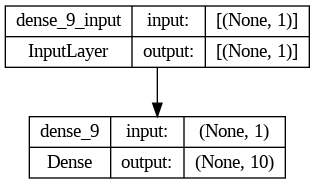

In [ ]:
tf.keras.utils.plot_model(model=model, show_shapes= True)

In [ ]:
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1],name = "input_layer"), #passing 1 number to predict 1 number
    tf.keras.layers.Dense(1, name="output_layer")
], name= "Sample_Model")

# 2. Compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.summary()

Model: "Sample_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Fitting the model to training data
model.fit(X_train,y_train, epochs=100, verbose=0) #set verbose=0 for silent fitting of the model

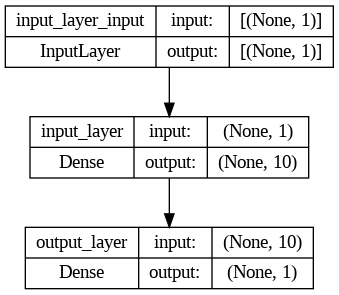

In [ ]:
tf.keras.utils.plot_model(model=model, show_shapes= True)

### Visualizing the model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` oe `y_true` vs `y_pred` (ground truth versus our model's predictions)


In [ ]:
# Making some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 55ms/step


array([[ 70.31464 ],
       [ 74.8873  ],
       [ 79.45995 ],
       [ 84.03262 ],
       [ 88.60527 ],
       [ 93.17793 ],
       [ 97.750595],
       [102.32326 ],
       [106.895905],
       [111.46857 ]], dtype=float32)

In [ ]:
# The ground truth labels
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Creating a plotting function
def plot_predictions(train_data= X_train,
                     train_labels= y_train,
                     test_data= X_test,
                     test_labels= y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10,7))
  # Plotting training data in blue
  plt.scatter(train_data, train_labels,c="b",label="Training Data")
  # Plotting testing data in red
  plt.scatter(test_data,test_labels,c="r",label="Testing Data")
  #Plotting the model's predictions in green
  plt.scatter(test_data,predictions,c="g",label="Model Predictions")
  # Show the legend
  plt.legend();


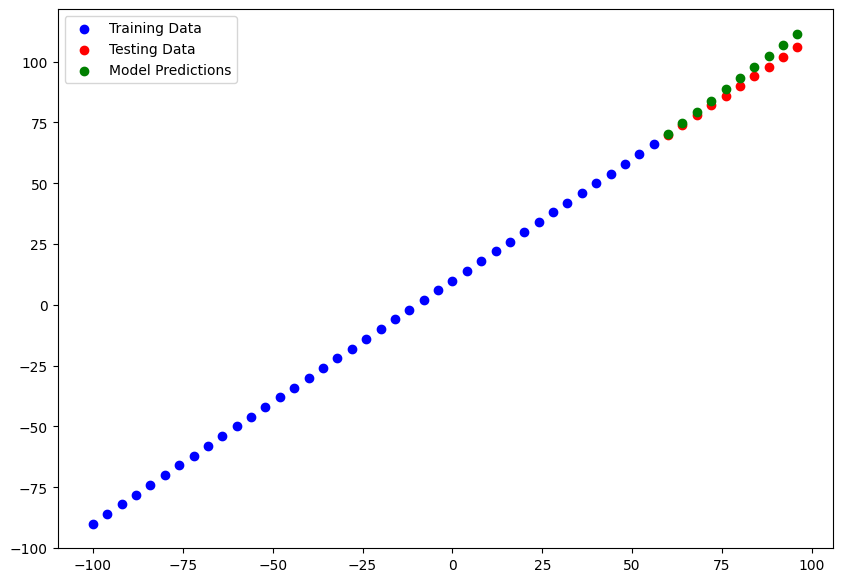

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels= y_train,
                 test_data= X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating the model's predictions with regression evaluation metrics

Depending on the problem, there will be different evaluation metrics to evaluate the model's performance.

For our use case now, regression problem has two of the main metrics:
* MAE -  mean absolute error, "on average, how wrong is each of the model's predictions? "
* MSE - mean square error, "Square the average errors and average it

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 230ms/step - loss: 2.8916 - mae: 2.8916


[2.8916046619415283, 2.8916046619415283]

In [ ]:
# Calculate the mean absolute error
mae = tf.keras.losses.mae(y_test,tf.squeeze(tf.constant(y_pred))) # converted y_pred into a tensor then removed the extra dimension (made into right shape)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.891604>

In [ ]:
tf.constant(y_pred) #making the dimensions same by removing the extra dimension
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.31464 ,  74.8873  ,  79.45995 ,  84.03262 ,  88.60527 ,
        93.17793 ,  97.750595, 102.32326 , 106.895905, 111.46857 ],
      dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Calculating the mean squared error
mse = tf.keras.losses.mse(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=11.066863>

### Running experiments to improve the model

1. Getting more data -> more opportunities to learn patterns or relationships between features and labels.
2. Make the model larger (using a more complex model) -> this comes in form of more layers of more hidden units in each layer.
3. Training the model for longer -> Increasing the number of epochs, giving the model more chances to go through the data to have a better chance at finding patterns within the data.


In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
# model_1 = same as original model ,1 layer , trained for 100 epochs
# model_2 = 2 layers, trained for 100 epochs
# model_3 = 2 layers, trained for 500 epochs

# Building model_1

# Setting the random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss= tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.SGD(),
                metrics= ["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=0)

1/1 [==============================] - 0s 56ms/step


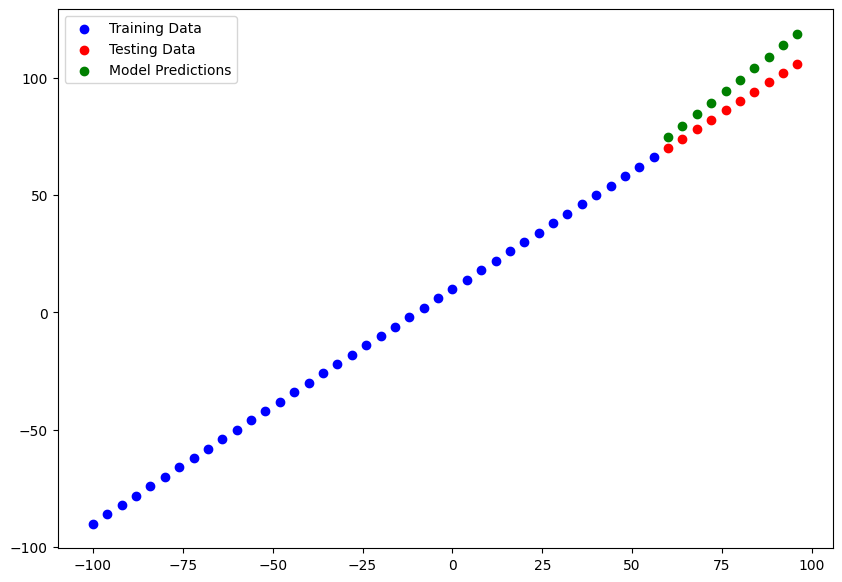

In [ ]:
# Make and plot predictions for model_1
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [ ]:
# Calculating model_1 evaluation metrics
mae_1 = tf.keras.losses.mae(y_test,tf.squeeze(y_pred_1))
mae_1


<tf.Tensor: shape=(), dtype=float32, numpy=8.660636>

In [ ]:
mse_1 = tf.keras.losses.mse(y_test,tf.squeeze(y_pred_1))
mse_1

<tf.Tensor: shape=(), dtype=float32, numpy=81.54428>

In [ ]:
# Building model_2 , 2 Dense layers trained for 100 epochs with metrics as mse

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss= tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)


Epoch 1/100
2/2 [==============================] - 0s 13ms/step - loss: 52.9663 - mse: 4364.2725
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 28.9702 - mse: 1091.9480
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 33.6447 - mse: 1714.6458
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 29.3756 - mse: 1281.5686
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 15.8853 - mse: 332.5877
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 12.5785 - mse: 207.3200
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 11.8276 - mse: 173.6551
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 10.8247 - mse: 128.8407
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 37.0177 - mse: 2098.7507
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 24.7619 - mse: 859.1590
Epoch 11/100
2/2 [======================

1/1 [==============================] - 0s 67ms/step


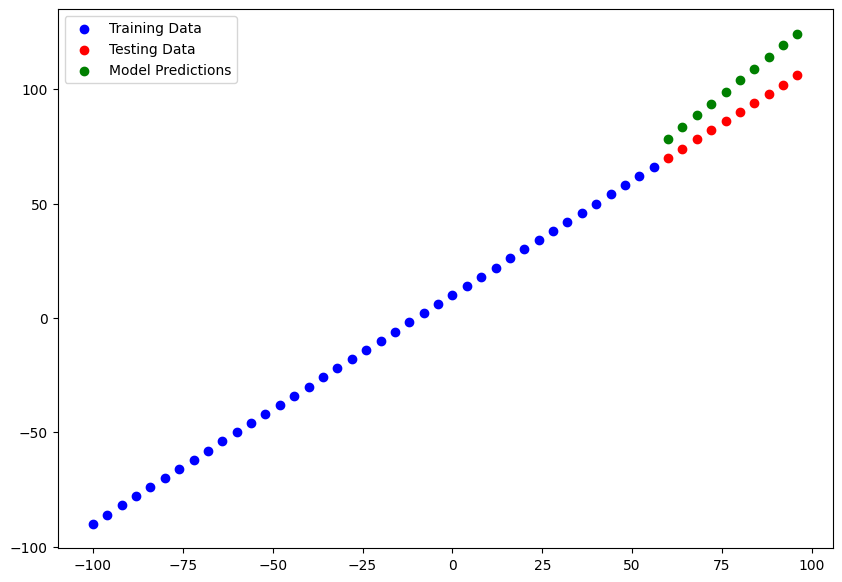

In [ ]:
# Make and plot predictions of model_2
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [ ]:
# Calculating model_2 evaluation metrics
mae_2 = tf.keras.losses.mae(y_test,tf.squeeze(y_pred_2))
mae_2


<tf.Tensor: shape=(), dtype=float32, numpy=13.251289>

In [ ]:
mse_2 = tf.keras.losses.mse(y_test,tf.squeeze(y_pred_2))
mse_2

<tf.Tensor: shape=(), dtype=float32, numpy=185.60396>

In [ ]:
# Building model_3, 2 Dense layers, trained for 500 epochs

# Setting the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1),y_train,epochs=500,verbose=0)

1/1 [==============================] - 0s 67ms/step


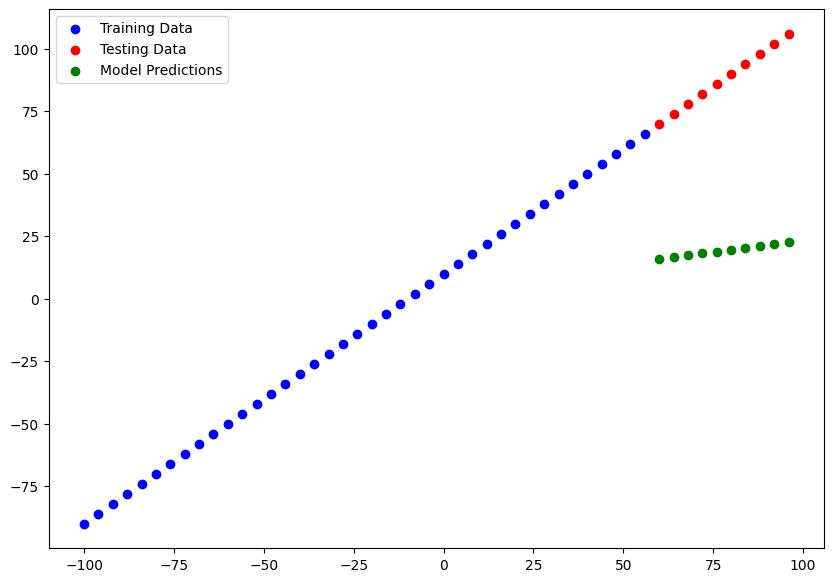

In [ ]:
# Make and plot the predictions for model_3
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=tf.squeeze(y_pred_3)) # Model overfitting here -> bad

In [ ]:
# Calculating the evaluation metrics for model_3
mae_3 = tf.keras.losses.mae(y_test,tf.squeeze(y_pred_3))
mae_3

<tf.Tensor: shape=(), dtype=float32, numpy=68.727036>

In [ ]:
mse_3 = tf.keras.losses.mse(y_test,tf.squeeze(y_pred_3))
mse_3

<tf.Tensor: shape=(), dtype=float32, numpy=4809.9326>

### Comparing the results of different models / experiments



In [ ]:
# Comparing the model's results using pandas DataFrame
import pandas as pd
model_results = [["model_1",mae_1.numpy(),mse_1.numpy()],
                 ["model_2",mae_2.numpy(),mse_2.numpy()],
                 ["model_3",mae_3.numpy(),mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns = ["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,8.660636,81.544281
1,model_2,13.251289,185.603958
2,model_3,68.727036,4809.932617


In [ ]:
model_2.summary() #looks like model_2 performed best

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                20        
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Tracking the experiments

Tracking the results of our experiments is a good habit in machine learning modelling, as it can be tedious if the number of experiments is very large.

There are certain tools to solve this problem:
1. TensorBoard - a component of the TensorFlow library to help track modelling experiments
2. Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard)

### Saving the models

Saving our models allows us to use them outside of wherever they were trained such as a web application or a Mobile app.

There are 2 main formats we can save our model's -
1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save model using SavedModel format
model_2.save("best_model")

In [ ]:
# Save model using HDF5 format
model_2.save("best_model_HDF5.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Loading in a saved model

In [ ]:
# Load in the Saved Model format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model")
loaded_SavedModel_format.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                20        
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                20        
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Checking the saved model with some predictions to compare with model_2
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)

1/1 [==============================] - 0s 55ms/step


In [ ]:
tf.keras.losses.mae(y_test,tf.squeeze(model_2_preds)) == tf.keras.losses.mae(y_test,tf.squeeze(loaded_SavedModel_format_preds))

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
# Loading model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5.h5")
loaded_h5_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                20        
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Check to see if the loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
tf.squeeze(model_2_preds) == tf.squeeze(loaded_h5_model_preds) #successfully loaded the model in both formats and they are same as the saved model

1/1 [==============================] - 0s 97ms/step


<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])>

### Downloading a model from colab

To download files from Google colab :
1. Go to the "files" section of colab and right click download.
2. Using code to download.

In [ ]:
# Downloading a file from Google Colab
from google.colab import files
file_path = "/content/best_model_HDF5.h5"
#files.download(file_path)

### Working on a bigger dataset

Medical Health Insurance Prediction using Deep Learning model [Regression problem]

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Reading the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Here the dependant variable or the outcome variable is charges
# and the independant variables or the features are age, sex, bmi....

# First converting the features into numbers (numerical encoding) using one hot encoding [categorical variables to numerical variables]
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Creating X and y values (features and labels)
X = insurance_one_hot.drop("charges",axis=1)
y = insurance_one_hot["charges"]

In [ ]:
# Viewing X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# Viewing y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Creating training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
len(X) , len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [ ]:
# Buidling a neural network

# Setting the random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss= tf.keras.losses.mae,
                        optimizer= tf.keras.optimizers.SGD(),
                        metrics= ["mae"])

# 3. Fit the model
insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 6ms/step - loss: 8497.4297 - mae: 8497.4297
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7884.0288 - mae: 7884.0288
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7597.4932 - mae: 7597.4932
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7680.7896 - mae: 7680.7896
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7690.1138 - mae: 7690.1138
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 7647.0957 - mae: 7647.0957
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7527.4512 - mae: 7527.4512
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7786.7217 - mae: 7786.7217
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7628.4058 - mae: 7628.4058
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7754.4409 - mae: 7754.4409

In [ ]:
# Check the results of the insurance_model on the test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8553.0029 - mae: 8553.0029


[8553.0029296875, 8553.0029296875]

#### Trying to improve the model

1. Adding an extra layer with more hidden units and Change the optimzer function to Adam
2. Train for longer
3.

In [ ]:
# Setting the random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss= tf.keras.losses.mae,
                          optimizer= tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train,y_train,epochs=100,verbose=0)

In [ ]:
# Evaluating the larger model
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4859.7700 - mae: 4859.7700


[4859.77001953125, 4859.77001953125]

In [ ]:
# insurance_model_3

# Setting the random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss= tf.keras.losses.mae,
                          optimizer= tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train,y_train,epochs=200,verbose=0) #using history object

In [ ]:
# Evaluate the model_3
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3493.3647 - mae: 3493.3647


[3493.36474609375, 3493.36474609375]

Text(0.5, 0, 'epochs')

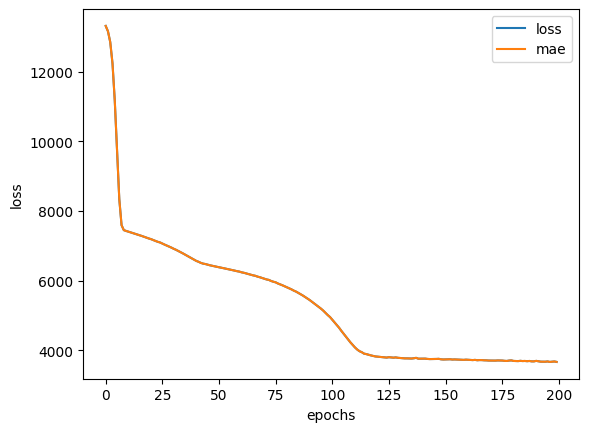

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot() # plotting using the Dataframe object
plt.ylabel("loss")
plt.xlabel("epochs")

#### How long to train a model for -

Solution : EarlyStopping Callback, which is a TensorFlow component that can be added to the model which stops training once the model doesn't improve a certain metric for the consecutive number of epochs.

### Preprocessing Data (Normalization and Standardization) :

 Scaling features [through normalization or standardization] , neural networks tend to prefer normalization.

 The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.

<Axes: ylabel='Frequency'>

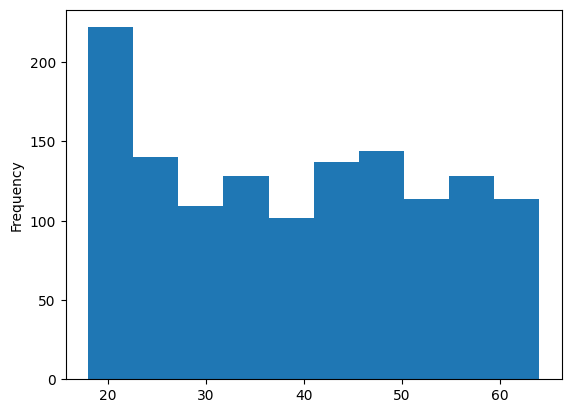

In [24]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

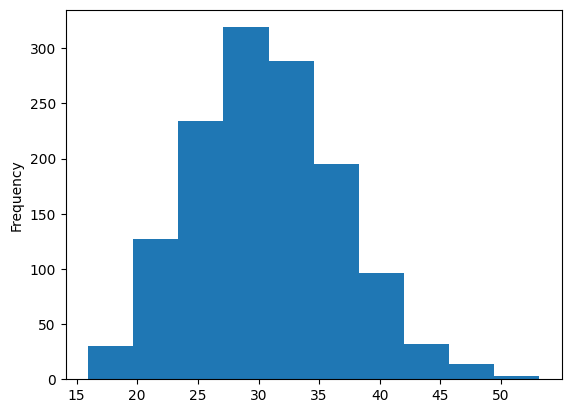

In [25]:
X["bmi"].plot(kind="hist")

In [26]:
# Scaling -> Converts all values to between 0 and 1 whilst preserving the original distribution.
# MinMaxScaler : When to use -> Use as default scaler with neural networks.

# Standardization -> Removes the mean and divides each value by the standard deviation.
# StandardScaler : When to use -> Transform a feature to have close to normal distribution (reduces the effects of outliers in the data)

import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Reading the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Preparing our data using Scikit-Learn

In [29]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]), #Normalizing the values of these columns between 0 to 1 range
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"]) #turning categorical values encoded into numerical values
)

# Create X and y
X = insurance.drop("charges",axis=1)
y= insurance["charges"]

# Building the test and train sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

#Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and testing data with MinMaxScaler (Normalization) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [30]:
# Original data and how it looks like
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [32]:
# The normalized data
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [33]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [34]:
# Checking if the shapes of the data has changed after normalization
X_train.shape, X_train_normal.shape # added extra columns after normalization

((1070, 6), (1070, 11))

#### Now building a neural network on this!

In [37]:
# Building a neural network to fit the model on the new normalized data

# Setting the random_seed
tf.random.set_seed(42)

# 1. creating the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fitting the model
insurance_model_4.fit(X_train_normal,y_train,epochs =100)


Epoch 1/100
34/34 [==============================] - 2s 4ms/step - loss: 13344.5654 - mae: 13344.5654
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13337.5303 - mae: 13337.5303
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 13319.5557 - mae: 13319.5557
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13280.4844 - mae: 13280.4844
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13209.0244 - mae: 13209.0244
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 13093.8223 - mae: 13093.8223
Epoch 7/100
34/34 [==============================] - 0s 6ms/step - loss: 12924.3037 - mae: 12924.3037
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 12690.2227 - mae: 12690.2227
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 12381.2217 - mae: 12381.2217
Epoch 10/100
34/34 [==============================] - 0s 6ms/step - loss: 11991.12

In [38]:
# Evaluating the model trained on normalized data
insurance_model_4.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3441.4341 - mae: 3441.4341


[3441.43408203125, 3441.43408203125]

#### Exercise - Working with Boston House Pricing Dataset

In [52]:
from tensorflow import keras
# Loading the dataset

(X_train, y_train), (X_test, y_test) = keras.datasets.boston_housing.load_data()

In [53]:
# Checking the data shape
X_train.shape, y_train.shape

((404, 13), (404,))

In [54]:
# Building the model

#Set the random seed
tf.random.set_seed(42)

# 1. Creating the model
boston_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
boston_model.compile(loss= tf.keras.losses.mae,
                     optimizer= tf.keras.optimizers.Adam(),
                     metrics = ["mae"])
# 3. Fit the model
history= boston_model.fit(X_train,y_train, epochs=100,verbose=0)  # making a history object to plot the loss curve

In [55]:
# Evaluating the model on test data
boston_model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 3.9839 - mae: 3.9839


[3.983898639678955, 3.983898639678955]

Text(0.5, 0, 'epochs')

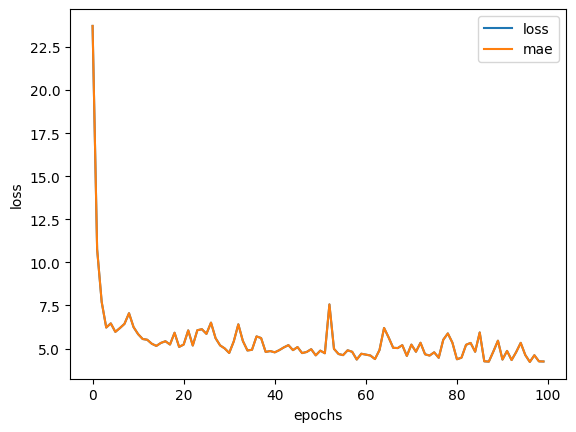

In [56]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot() # plotting using the Dataframe object
plt.ylabel("loss")
plt.xlabel("epochs")